In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_auc_score, f1_score, roc_curve)

In [2]:
y = np.load(open("../../npy/opcodes-y-full-ordered.npy","rb"))
x_pca = np.load(open("../../npy/opcodes-x-pca-ordered.npy","rb"))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size=0.7, random_state=42)

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X=x_train, y=y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [5]:
rf_y_train_predict = rf.predict(x_train)
rf_y_test_predict = rf.predict(x_test)

rf_y_test_predict_prova = rf.predict_proba(x_test)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, rf_y_test_predict_prova[:,1], pos_label=1)
rf_auc = roc_auc_score(y_test, rf_y_test_predict_prova[:,1])

rf_f1_train = f1_score(y_true=y_train, y_pred=rf_y_train_predict)
rf_f1_test = f1_score(y_true=y_test, y_pred=rf_y_test_predict)


In [6]:
dt = DecisionTreeClassifier(min_samples_split=100, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=100, random_state=42)

In [7]:
dt_y_train_predict = dt.predict(x_train)
dt_y_test_predict = dt.predict(x_test)

dt_y_test_predict_prova = dt.predict_proba(x_test)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, dt_y_test_predict_prova[:,1], pos_label=1)
dt_auc = roc_auc_score(y_test, dt_y_test_predict_prova[:,1])



dt_f1_train = f1_score(y_true=y_train, y_pred=dt_y_train_predict)
dt_f1_test = f1_score(y_true=y_test, y_pred=dt_y_test_predict)



In [8]:
knn = KNeighborsClassifier(n_neighbors=100, n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=100)

In [9]:
knn_y_train_predict = knn.predict(x_train)
knn_y_test_predict = knn.predict(x_test)

knn_y_test_predict_prova = knn.predict_proba(x_test)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_y_test_predict_prova[:,1], pos_label=1)
knn_auc = roc_auc_score(y_test, knn_y_test_predict_prova[:,1])



knn_f1_train = f1_score(y_true=y_train, y_pred=knn_y_train_predict)
knn_f1_test = f1_score(y_true=y_test, y_pred=knn_y_test_predict)



#### RoC Curves

Text(0, 0.5, 'Taxa de Verdadeiro Positivo')

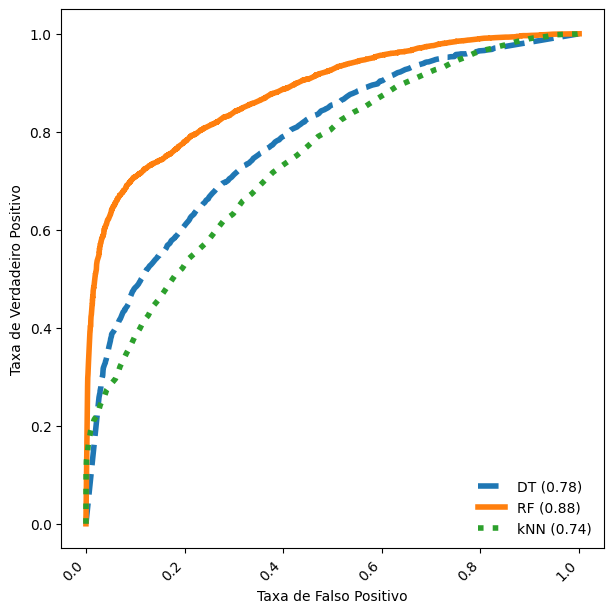

In [10]:
plt.figure(figsize=(7, 7))
plt.plot(dt_fpr, dt_tpr,label=f"DT ({round(dt_auc,2)})",linewidth=4, linestyle='dashed')
plt.plot(rf_fpr, rf_tpr,label=f"RF ({round(rf_auc,2)})",linewidth=4, linestyle='solid')
plt.plot(knn_fpr, knn_tpr,label=f"kNN ({round(knn_auc,2)})",linewidth=4, linestyle='dotted')
plt.legend(frameon=False, loc=4) 
plt.xticks(rotation=45, ha='right')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')